# Business Case: healthyfi.me
healthyfi.me has labelled its customers based on the highest intensity of work they could perform, namely, `A`, `B`, `C` and `D`.

Given a new customer, help healthyfi.me in recommending customized workout plans by predicting the customer's class.

### Data dictionary
| id | features | description |
| :-: | :-: | :-: |
| 01 | `age` | age of the customer |
| 02 | `gender` | gender of the customer (M/F) |
| 03 | `height_cm` | height of the customer in cm |
| 04 | `weight_kg` | weight of the customer in kg |
| 05 | `body_fat_`% | % of fat in customer's body |
| 06 | `diastolic` | diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats |
| 07 | `systolic` | systolic blood pressure, measures the pressure in your arteries when your heart beats |
| 08 | `gripForce` | strength of customer's grip |
| 09 | `sit and bend forward_cm` | to measure flexibility of customer |
| 10 | `sit-ups counts` | count of sit-ups customer can perform |
| 11 | `broad jump_cm` | It is the max jump customer can perform in cm |
| 12 | `class` | Category of customer based on the intensity of workout |

# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading The Dataset

In [2]:
df = pd.read_csv("healthyfime.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


Observations from the above snippet of the data,
- The `age` feature is very crucial in predicting the class of highest intensity workout.
- Features like, `height`, `weight`, `diastolic`, etc are crucial in predicting the workout intensity. The reason: A high intensity cannot be predicted to candidates with high blood pressure.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


# EDA
- `gender` has 2 unique values and `class` has 4 unique values.
- Binary encoding (`0` and `1`) can be applied on `gender`.
- Since `class` is ordinal in nature, label encoding (`0`, `1`, `2`, `3`) can be applied on it.

In [4]:
# df["gender"].replace({"M": 0, "F": 1}, inplace = True)
# df.head()
df.replace({"M": 0, "F": 1}, inplace = True)
df.head()

/var/folders/xl/sjrt7p6548j9h6x1rz_px87w0000gn/T/ipykernel_66574/3792586169.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"M": 0, "F": 1}, inplace = True)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
classes = list(df["class"].unique())
mapping_dict = {ch: i for i, ch in enumerate(sorted(classes, reverse = True))}
print(mapping_dict)

{'D': 0, 'C': 1, 'B': 2, 'A': 3}


In [6]:
df["class"].replace(mapping_dict, inplace = True)
df.head()

/var/folders/xl/sjrt7p6548j9h6x1rz_px87w0000gn/T/ipykernel_66574/140115674.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["class"].replace(mapping_dict, inplace = True)
/var/folders/xl/sjrt7p6548j9h6x1rz_px87w0000gn/T/ipykernel_66574/140115674.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


In the above step,
- All the strings are mapped to the integers in a reversed manner, i.e., `D` is mapped to `0` and `A` is mapped to `3`.
- Then all the values in the `class` features are replaced with the mapped values.

# Correlations

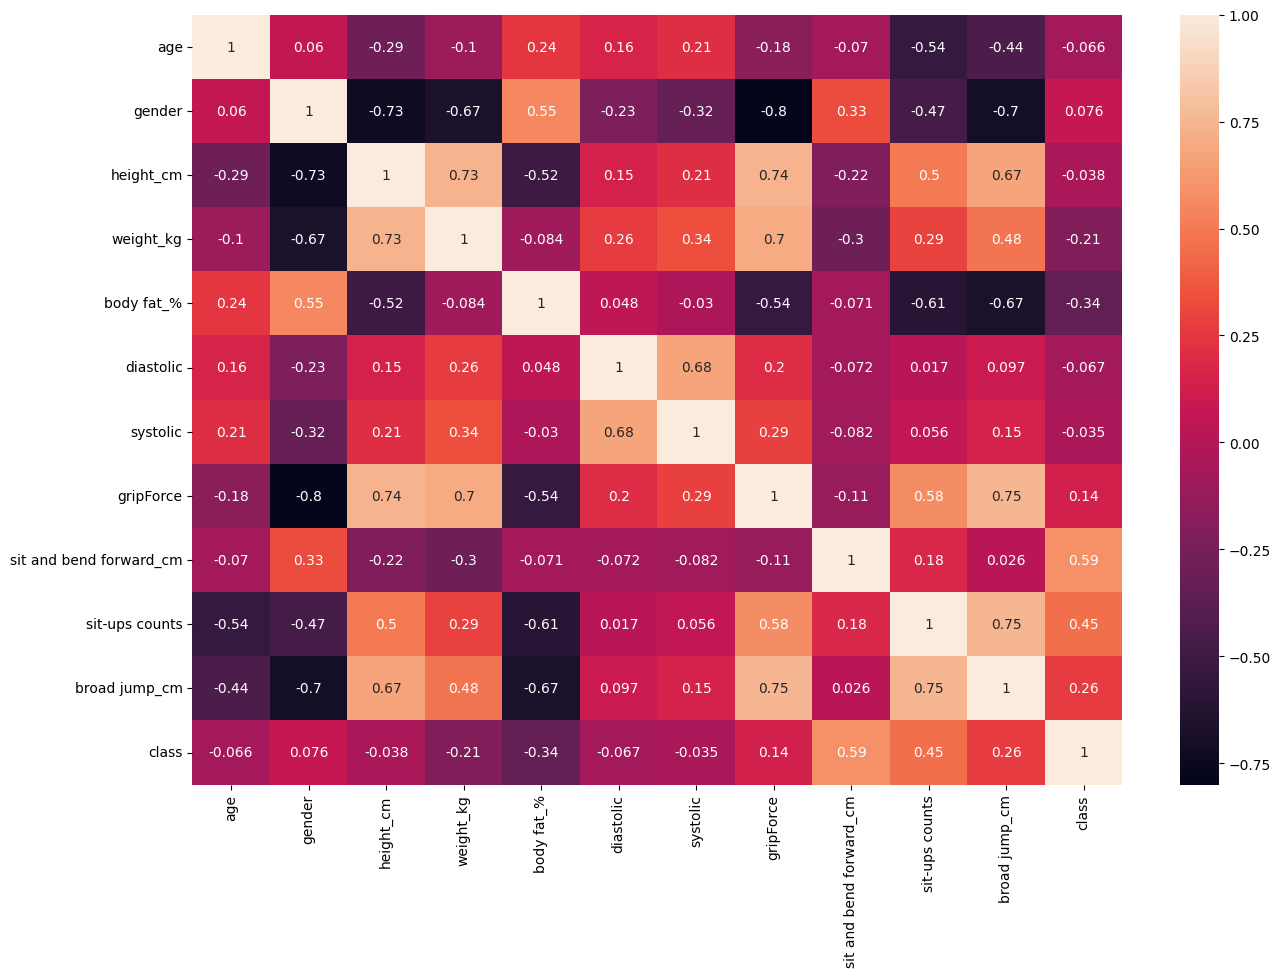

In [7]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

There are no storng correlations between any of the features.

A Boxplot can be used to understand the range and distribution of all variables.

<function matplotlib.pyplot.show(close=None, block=None)>

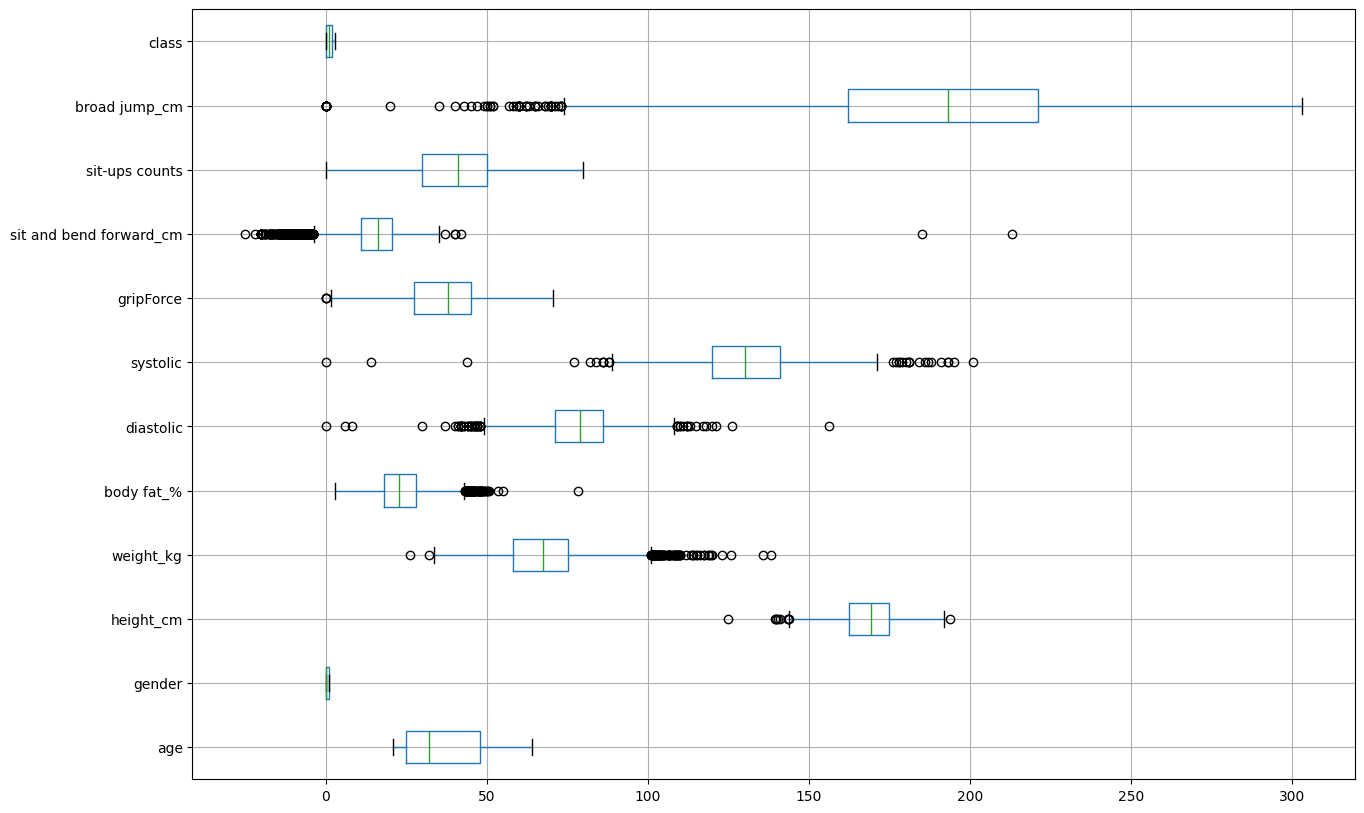

In [8]:
plt.figure(figsize = (15, 10))
df.boxplot(rot = 0, vert = False)
plt.show

# Separating The Independent And Dependent Variables

In [9]:
x = df.drop(columns = ["class"])
y = df["class"]
x.shape, y.shape

((13393, 11), (13393,))

# Split The Data Into Train, Test And Validation

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((10847, 11), (10847,), (1206, 11), (1206,), (1340, 11), (1340,))

# Scaling The Data Using `StandardScaler`

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train, y_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

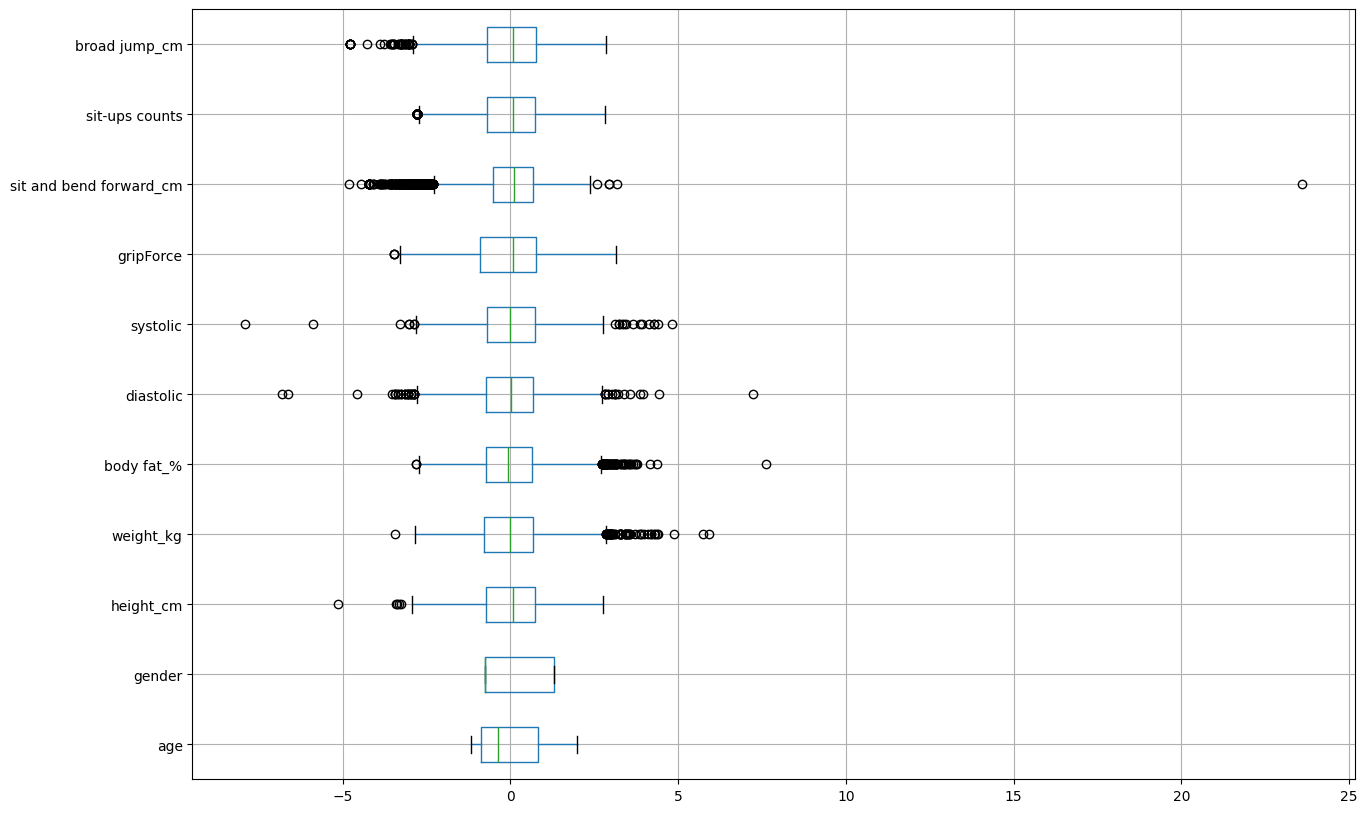

In [12]:
plt.figure(figsize = (15, 10))
pd.DataFrame(x_train, columns = df.columns[:-1]).boxplot(rot = 0, vert = False)
plt.show()

The data is ready for model building.

# Tensorflow

In [13]:
# importing tensorflow
import tensorflow as tf

# checking the version of tensorflow
tf.__version__

'2.18.0'

### What is TensorFlow?
TensorFlow (`tensorflow`) is a powerflow open-source library developed by Google for Machine Learning and Artificial Intelligence. It is designed to make it easier to build and train complex Neural Networks

Key features:
- Data flow graphs: TensorFlow uses a computational graph approach, where nodes represent mathematical operations and edges represent the data (tensors) flowing between them. This allows for efficient execution on various hardware platforms.
- Flexible architecture: It can run on a single device (CPU or GPU) or be scaled to distributed systems with multiple GPUs or TPUs.
- High-level API (Keras (`keras`)): Keras, integrated into TensorFlow, provides a user-friendly interface for building and training models, making it accessible to both beginners and experienced developers.
- Low-level API (TensorFlow Core): For advanced users, TensorFlow Core offers fine-grained controls over the underlying computations, allowing for custom optimizations and experimentation.
- Wide range of applications: TensorFlow is used for various tasks, including image recognition, natural language processing, speech recognition and more.

TensorFlow modules,
- `tf.keras`
- `tf.data`

# `tf.keras`

### What is Keras?
Keras is a high-level Neural Network API that runs on top of TensorFlow (and other backends like Theano and CNTK). It is designed to be user-friendly and flexible, making it a popular choice for both beginners and experienced Machine Learning practitioners.

Key features,
- User-friendly API: Kerasa provides a simple and intuitive API, making it easy to build and train Neural Networks.
- Modularity: Keras is built on the principle of modularity, which allows to easily combine different componenta (layers, optimizers, etc) to create complex models.
- Flexibility: While it offers a high-level API, Keras also provides access to the underlying TensorFlow backend for more advanced customization.
- Rapid prototyping: Keras is designed to enable rapid experimentation and model development.
- Cross-platform compatibility: Keras can run on various hardware platforms including CPUs, GPU and TPUs.

### How is it different from TensorFlow?
While both Keras and TensorFlow are powerful tools for machine learning, they differ in their level of abstraction and complexity.

TensorFlow,
- Low-level API: It provides a low-level API, giving you fine-grained control over the underlying computations. This allows for highly customized and optimized models.   
- Flexibility: You can build complex and custom architectures, but it requires a deeper understanding of machine learning concepts and TensorFlow's framework.   
- Scalability: TensorFlow is designed to handle large-scale datasets and complex models, making it suitable for research and production environments.

Keras,
- High-level API: It offers a simpler and more user-friendly API, making it easier to build and train models quickly.   
- Ease of use: Keras abstracts away many of the complexities of deep learning, allowing you to focus on model architecture and training.   
- Rapid prototyping: It's ideal for rapid prototyping and experimentation.

In essence, Keras is built on top of TensorFlow. It provides a higher-level interface that simplifies the process of building and training neural networks. You can think of Keras as a user-friendly wrapper around TensorFlow.

When to use which,
- Keras: Ideal for beginners and rapid prototyping.   
- TensorFlow: Suitable for advanced users who need more control over the underlying computations and for large-scale, complex models.

### Advantages of Keras in TensorFlow
- Simplified API: Keras offers a user-friendly API that significantly reduces the complexity of building and training deep learning models. It is designed to be intuitive and easy to learn even for beginners.
- Seamless integration: Keras is now directly integrated into TensorFlow 2, eliminating the need for separate installation. This streamlined process makes it even more accessible to developers.
- Rapid prototyping: Keras' high-level abstractions enable rapid experimentation and model development, which allows to quickly iterate on ideas and explore different architectures.
- Flexibility: While Keras provides a simple interface for common tasks, it also offers flexibility for advanced users who need to customize their models or delve into the underlying TensorFlow operations.
- Broad community support: Keras has a large and active community, providing extensive documentation, tutorials and forums for support and knowledge sharing.

The following are the various activation functions available inside Keras,

In [14]:
dir(tf.keras)

['DTypePolicy',
 'FloatDTypePolicy',
 'Function',
 'Initializer',
 'Input',
 'InputSpec',
 'KerasTensor',
 'Layer',
 'Loss',
 'Metric',
 'Model',
 'Operation',
 'Optimizer',
 'Quantizer',
 'Regularizer',
 'Sequential',
 'StatelessScope',
 'SymbolicScope',
 'Variable',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'config',
 'constraints',
 'datasets',
 'device',
 'distribution',
 'dtype_policies',
 'export',
 'initializers',
 'layers',
 'legacy',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'name_scope',
 'ops',
 'optimizers',
 'preprocessing',
 'quantizers',
 'random',
 'regularizers',
 'tree',
 'utils',
 'version',
 'visualization']

In [15]:
dir(tf.keras.activations)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'celu',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'glu',
 'hard_shrink',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'hard_tanh',
 'leaky_relu',
 'linear',
 'log_sigmoid',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'soft_shrink',
 'softmax',
 'softplus',
 'softsign',
 'squareplus',
 'swish',
 'tanh',
 'tanh_shrink']

# `tf.data`

In [16]:
dir(tf.data)

['AUTOTUNE',
 'Dataset',
 'DatasetSpec',
 'FixedLengthRecordDataset',
 'INFINITE_CARDINALITY',
 'Iterator',
 'IteratorSpec',
 'NumpyIterator',
 'Options',
 'TFRecordDataset',
 'TextLineDataset',
 'ThreadingOptions',
 'UNKNOWN_CARDINALITY',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'experimental']

There are 2 ways using which code can be written in Keras,
1. Sequential API.
2. Functional API.

For the sake of this document, the Seqential API is used.

# Keras Sequential API
The Sequential API in Keras is a straightforward way to define a neural network model by stacking layers sequentially. It's ideal for simple, linear models where the output of one layer feeds directly into the input of the next.

### Limitations of Sequential API:
While the Sequential API is simple and easy to use, it's not suitable for complex architectures with shared layers, multiple inputs, or multiple outputs. For these cases, you'll need to use the more flexible Functional API.

The following is done in the code lines below,
- The `Sequential` class from `tnsorflow.keras.models` is imported in which the layers of the Neural Network are sequentially positioned.
- The `Dense` layer is also imported from `tensorflow.keras.layers`. A `Dense` layer helps in defining one layer of a feed forward Neural Network. In a `Dense` layer, every neuron is connected to every neuron in the preceding layer, hence the name "dense." This ensures that each neuron considers the input from all previous neurons.

<img src = "../artifacts/neural_networks_57.png" alt = "drawing" width = "500">

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

The following is done in the code lines below,
- An instance (object) of the `Sequential` class is created with the name `model`.
- It is same as creating an instance as was done in `sklearn`, just that, in this case, the model is defined as well.
- `Sequential` model will take a list of layers as arguments.

In [18]:
# defining a feed forward network with a single hidden layer
model = Sequential(
    [
        Dense(64, activation = "relu"), # hidden dense layer with 64 neuron units
        Dense(4, activation = "softmax") # output layer wit 4 units and softmax activation
    ]
)
# the activation argument is optional, if it is not passed, then there will linear or no activation

### Why is activation function needed?
It provides non-linearity to problems.

### In what case, an activation function will not be passed?
Output layer of regression model.

### How to find if there is a method to check the weights of a model?
`dir(model)`

In [19]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_allow_non_tensor_positional_args',
 '_api_export_path',
 '_api_export_symbol_id',
 '_assert_compile_called',
 '_assert_input_compatibility',
 '_assign_variable_values',
 '_auto_config',
 '_build_by_run_for_kwargs',
 '_build_by_run_for_single_pos_arg',
 '_build_shapes_dict',
 '_call_has_mask_arg',
 '_call_has_training_arg',
 '_call_signature',
 '_called',
 '_check_quantize_args',
 '_check_super_called',
 '_checkpoint_adapter',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_clear_previous_trainer_metrics',
 '_compile_loss',
 '_c

### Checking the model weights

In [20]:
model.weights

[]

The above output means that the model has not created weights yet.

### Input shape
- Since the model does not know about the input size yet, tensorflow does not have any information to create weights and biase yet.
- the input size can be passed as an argument in the first layer.

In [21]:
model = Sequential(
    [
        Dense(64, activation = "relu", input_shape = (11, )),
        Dense(4, activation = "softmax")
    ]
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In the above code,
- 1 training example will be a 11 dimensional feature vector `(11, )`.
- For each of the feature vector from the input, there will be an output of 64-dimensional feature vector `(64, )`.
- In case of a `Dense` layer, $y = x * w + b$, where $x$ has all the features as columns.
- The output of the first layer will have the dimensions `(m, 64)`, where `m` is the number of input data samples.

### Why were weights not defined in second `Dense` layer?
The layers in the sequential model interact with each other. Therefore, there is no need to define the input shape for all the layers.

In [22]:
# the weights will be created now
print(model.weights)

[<Variable path=sequential_1/dense_2/kernel, shape=(11, 64), dtype=float32, value=[[ 3.83750200e-02  1.20962530e-01 -2.15652347e-01 -2.38658190e-01
   9.52685475e-02  2.00371265e-01 -1.56160593e-02  2.09399581e-01
  -1.48418948e-01  1.16959810e-01 -1.15768701e-01  1.56615883e-01
  -1.61078721e-01 -1.36751890e-01  6.87568784e-02 -2.58423299e-01
  -2.24273369e-01  2.36426502e-01  5.23292720e-02 -7.15505779e-02
  -2.47931108e-01  1.46815956e-01 -4.77600098e-03 -1.45077154e-01
   1.92663670e-02 -1.44626543e-01 -1.83368534e-01  8.76069069e-03
  -1.60277799e-01  8.97010267e-02  3.86732817e-02  7.95274973e-03
   1.45059198e-01  2.06340045e-01 -2.57402658e-02  6.12581074e-02
   1.50858611e-01  2.16687828e-01 -1.05568156e-01 -9.71601605e-02
  -2.64286995e-01 -2.79805332e-01  6.73878193e-02 -1.14337385e-01
  -2.16209903e-01  7.67710507e-02 -8.98089409e-02 -2.50003725e-01
   2.72713274e-01  1.50279492e-01  9.12410617e-02  6.21846914e-02
  -5.06223440e-02 -4.67447639e-02  2.75545567e-01  1.0810828

In [23]:
type(model.weights)

list

In [24]:
for param in model.weights:
    print(param.shape)

(11, 64)
(64,)
(64, 4)
(4,)


The diagram below shows how the model's outputs look like for each layer,
- For the first layer, if an observation of dimension `1x11` is passed then an output of dimension `1x64` will be generated. Similarly it will be done for `m` observations.
- For the second layer, when an input of dimension `(1, 64)` is passed then an output of dimension `1x4` will be generated. Similarly it will be done for `m` observations.

<img src = "../artifacts/neural_networks_58.png" alt = "drawing" width = "500">

### Alternative way to define the same model using `model.add()`
Instead of passing the list of layers as an argument will creating a model instance, the `add()` method can be used.

In [25]:
model = Sequential()
model.add(Dense(64, activation = "relu", input_shape = (11, )))
model.add(Dense(4, activation = "softmax"))

### What to choose (list of layers or `add()`)?
This is a choice that is left to the user. If the model depends on a condition or may add some $x$ number of similar layers in the loop, `model.add` can be used. The condition can be checked using `if` and layer to the model can be added using `add()` method.

### What if the input had been a multi-dimensional data?

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model_2d = Sequential(
    [
        Flatten(input_shape = (28, 28)), # flatten the data to make it (784, ) to be based further
        Dense(64, activation = "relu"),
        Dense(4, activation = "softmax")

    ]
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Note: Multi-dimensional input can also be passed directly.

# Model summary
There is another short way to check the dimensions and parameters of each layer. This can be done by printing the model summary.

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,028 (4.02 KB)

 Trainable params: 1,028 (4.02 KB)

 Non-trainable params: 0 (0.00 B)

How are number of parameters computed in the above summary?
- Input is of shape `11 * (batch_size)` which is densly connected to 64 Neurons. So parameters are computed as, `(11 * 64) weights + 64 biases = 768`.
- Similarly, for the second layer, `4 * 64 + 4 = 260`

What does `None` represent in the above model's `Output Shape`?
- None makes the model capable of handling the multiple points.
- In the image seen above, where the dimension were being calculated, the dimensions were were calculated for a single example.
- But in an ideal scenario, there will be multiple points aand the number of points were not defined while defining the model. Therefore, the model is keeping it `None` for handling multiple number of passed observations.

### Assigning custom names to the layers
As seen in the model summary, Keras has assigned the names by itself. At times, there may be need to assign custome names to the layers as well.

In [28]:
model = Sequential(
    [
        Dense(64, activation = "relu", input_shape = (11, ), name = "hidden_1"),
        Dense(4, activation = "softmax", name = "output")
    ]
)

In [29]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,028 (4.02 KB)

 Trainable params: 1,028 (4.02 KB)

 Non-trainable params: 0 (0.00 B)

The model can also be plotted as a graph and can be saved as a `.png` file.

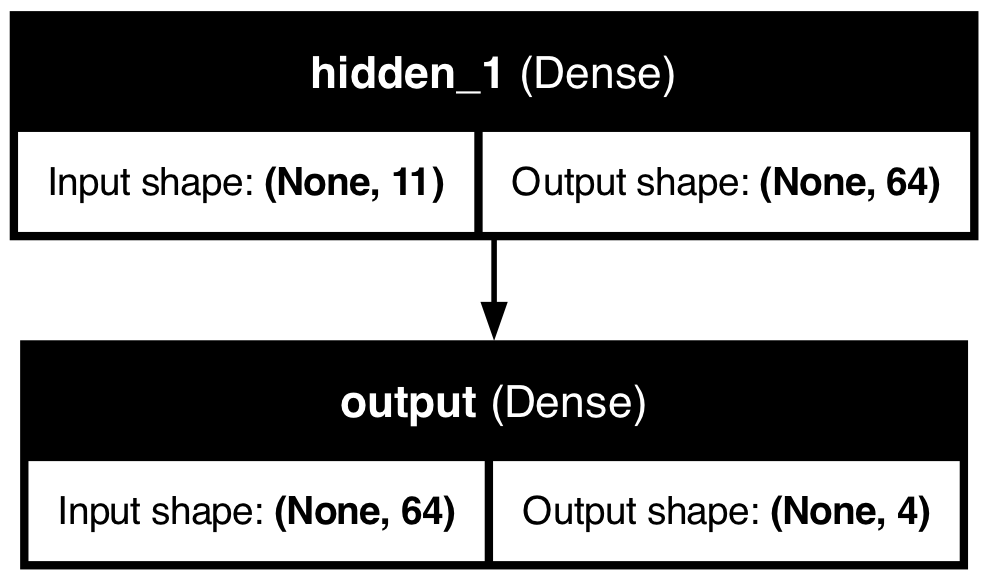

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file = "model.png",
    show_shapes = True,
    show_layer_names = True
)

From the plot it is observed that the first layer is the input layer and then the input and output shapes of each layers `hidden_1` and `output` are given

### Weights and bias initializer
When Neural Network was implemented from scratch, $w$ was initialized with `np.ranfdom.randn` and $b$ was initialized with `np.zeros`.

The following are the various weight initialization techniques,
- Glorot Normal: $w_{ij}^k \sim N(0,\sigma_{ij}). \text{Where, } \sigma_{ij} = \frac{2}{fanin+fanout}$.
- Glorot Uniform:  $w_{ij}^k \sim \text{Uniform }\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin+fanout}}, \frac{\sqrt{6}}{\sqrt{fanin+fanout}}\bigg]$.
- He Normal:  $N(0,\sigma), \text{Where, } \sigma = \frac{2}{fanin}$
- He Uniform:  $\text{Uniform }\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin}}, \frac{\sqrt{6}}{\sqrt{fanin}}\bigg]$

The end results of the classification and regression get affected by the initialization of the weights and biases.

The following is how Keras implements them,
- In the `Dense` layer of Keras,
    1. The biases are set to 0 (`zeros`) by default.
    2. The weights are set according to `glorot_uniform` (Glorot Uniform initializer) by default.
- For example,
    - $c = \frac{\sqrt{6}}{\sqrt{11+64}} = 0.28$. For the first hidden layer of the model, $fanin$ (input) is 11 and $fanout$ (output) is 64.

Note,
- There are several researches proposing different ways of randomly initializing the weights of the layers.
- But `glorot_uniform` has been most widely used one in most of the Deep Learning frameworks today.

### What if there is need to custom initialize the weights and biases (maybe for research)?
Each layer has optional arguments `kernel_initializer` and `bias_initializer` to set the weights and biases respectively.

In [31]:
model_x = Sequential(
    [
        Dense(64, activation = "relu", input_shape = (11, ), name = "hidden_1", kernel_initializer = "random_uniform", bias_initializer = "zeros"),
        Dense(4, activation = "softmax", name = "output", kernel_initializer = "he_uniform", bias_initializer = "ones")
    ]
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


A scratch approach can also be opted for by using `keras.initializer` module.

In [32]:
Dense(
    64,
    kernel_initializer = tf.keras.initializers.RandomNormal(mean = 0.0, stddev = 0.05),
    bias_initializer = tf.keras.initializers.Constant(value = 0.4),
    activation = "relu"
)

<Dense name=dense_8, built=False>

The layers of the model can be retrieved as follows,

In [33]:
model.layers

[<Dense name=hidden_1, built=True>, <Dense name=output, built=True>]

The following shows the histograms of initialized weights and biases.

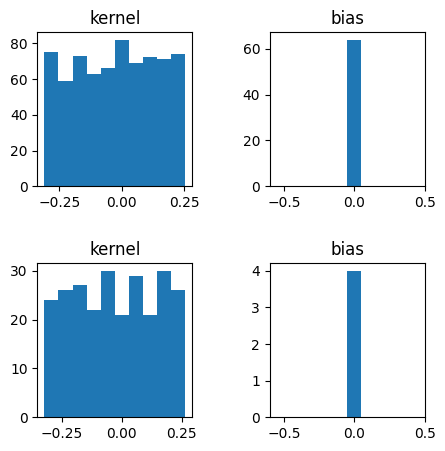

In [34]:
fig, axes = plt.subplots(2, 2, figsize = (5, 5))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
# extracting weights from the layers
weight_layers = [layer for layer in model.layers]
for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align = "left")
        axes[i, j].set_title(layer.weights[j].name)

`model.layers` consists a list of layers.

In the code, the weights and biases of all the layers are extracted using `layer.weights`, they are then converted to a `numpy` array and are then flattened to just get an array of initialized weights and biases.

It is observed from the plot that all the biases are initialized to `0` by default.

# Model Compilation: Loss And Optimizer
So far, the model's architecture has been defined. Now, the model has to be compiled.

### What specific information should be passed to the model while compiling it?
1. Loss function: To measure the model's performance as it trains.
2. Optimizer (like gradient descent): To perform the gradient update.

The above is done using 2 arguments of the `compile()` method, `optimizer` and `loss`.

The following is an example of a binary classification,

In [35]:
model_binary = Sequential(
    [
        Dense(64, activation = "relu", input_shape = (11, )),
        Dense(1, activation = "sigmoid")
    ]
)

model_binary.compile(
    optimizer = "adam",
    loss = " binary_crossentropy",
    metrics = ["accuracy"]
)

There are multiple options for optimizers, loss and metrics (check further documentation).

All the strings which have been passed as arguments i.e., "`adam`", "`binary_crossentropy`" and "`accuracy`" are reference to some default objects defined in Keras.

These custom objects can also be directly instantiated with the classes defined in Keras submodules for example `opt = keras.optimizers.Adam(learning_rate = 0.01)`.

Customized loss and optimizer functions can be passed in Keras models.

In the following code lines, the learning rate is changed by initializing a custom object.

In [36]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy()
)

Optionally, a list of metrics can be defined which could be tracked during training.

In [37]:
model = Sequential(
    [
        Dense(16, activation = "relu", input_shape = (11, ), name = "hidden_1"),
        Dense(8, activation = "relu", name = "hidden_2"),
        Dense(4, activation = "softmax", name = "output")
    ]
)

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

### How is sparse categorical cross entropy different from categorical cross entropy?
1. Use `categorical_crossentropy` if target is one hot-encoded, for example, [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1].
2. Use `sparse_categorical_crossentropy` if target vector is ordinal integer values, 0, 1, 2, 3.

These metrics will be calculated and saved after each epoch.

### What is an epoch?
When the data size is too big for the memory (RAM), the data is passed in small batches instead of one big batch. Each pass of these small batches is called an iteration.

Each pass of the whole dataset is called an epoch.

1 epoch means that each sample in the training dataset has had an opportuinity to update the internal model parameters.

### How to check if the loss and optimizers for the model are set?

In [38]:
model.loss

<LossFunctionWrapper(<function sparse_categorical_crossentropy at 0x15c2918a0>, kwargs={'from_logits': False, 'ignore_class': None})>

In [39]:
model.optimizer

# Model Training Using `fit()`
Model training involves updating the weights using the optimizer and loss functions on the dataset.

`model.fit(x_train, y_train)`

Where,
- `x_train` = `(num_samples, num_features)`.
- `y_train` = `(num_samples, num_classes)` or `(num_samples, )`.

### Arguments
- Number of epochs: 
    - `model.fit(x_train, y_train, epochs = 500)`.
- Batch size:
    - `model.fit(x_train, y_train, batch_size = 256)`.
    - Usually the batch size set is in the power of 2 (i.e., 2, 4, 8, 16, 32, 64, ...).
    - `batch_size = 16`, means 16 training samples are passed in each iteration.
    - Number of iterations in an epoch = Number of samples/ Batch size.
- `validation_split = 0.1` means that 10% of the training data will be used for validation.

In [40]:
def seed_everything(seed = 42):
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything()

A seed in Machine Learning is the initial state of a pseudo-random number generator.

Setting a specific seed ensures a deterministic sequence of numbers generated by the `random()` method.

Using the same seed guarantees identical weight initialization patterns, leading to consistent behavior across multiple runs of the same code.

In [41]:
%%time
# training a model for a few epochs
model.fit(x_train, y_train, epochs = 10, batch_size = 256, validation_split = 0.1, verbose = 1)

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3316 - loss: 1.3634 - val_accuracy: 0.3779 - val_loss: 1.2903
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4162 - loss: 1.2655 - val_accuracy: 0.4553 - val_loss: 1.2049
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4840 - loss: 1.1751 - val_accuracy: 0.4949 - val_loss: 1.1225
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5195 - loss: 1.0907 - val_accuracy: 0.5189 - val_loss: 1.0554
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5431 - loss: 1.0258 - val_accuracy: 0.5355 - val_loss: 1.0059
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5606 - loss: 0.9790 - val_accuracy: 0.5493 - val_loss: 0.9703
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5755 - loss: 0.9457 - val_accuracy: 0.5604 - val_loss: 0.9445
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5878 - loss: 0.9218 - val_accuracy: 0.5770 - val_loss:

The model has been trained for 10 epochs.

Observe that `model.fit` is printing all the metrics like accuracy, loss, validation loss, validation accuracy, etc.

### How can all this information be used for analyzing the training process?
To understand this, observe that the `model.fit` is returning a history object which contains the record of progress of NN training.

This history object contains records of loss and metrics values for each epoch. This history object is an example of something called "callback" (check further documentation).

In [42]:
%%time
# training the model for 500 epochs
history = model.fit(x_train, y_train, epochs = 500, batch_size = 256, validation_split = 0.1, verbose = 1)

Epoch 1/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6103 - loss: 0.8777 - val_accuracy: 0.6074 - val_loss: 0.8860
Epoch 2/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6158 - loss: 0.8675 - val_accuracy: 0.6083 - val_loss: 0.8760
Epoch 3/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6189 - loss: 0.8583 - val_accuracy: 0.6138 - val_loss: 0.8670
Epoch 4/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6219 - loss: 0.8498 - val_accuracy: 0.6184 - val_loss: 0.8589
Epoch 5/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6258 - loss: 0.8419 - val_accuracy: 0.6276 - val_loss: 0.8514
Epoch 6/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6311 - loss: 0.8344 - val_accuracy: 0.6313 - val_loss: 0.8442
Epoch 7/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6368 - loss: 0.8273 - val_accuracy: 0.6341 - val_loss: 0.8371
Epoch 8/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6416 - loss: 0.8205 - val_accuracy: 0.6387 - v

The following are plots of weights and biases after training. This is to see if there are any differences post training.

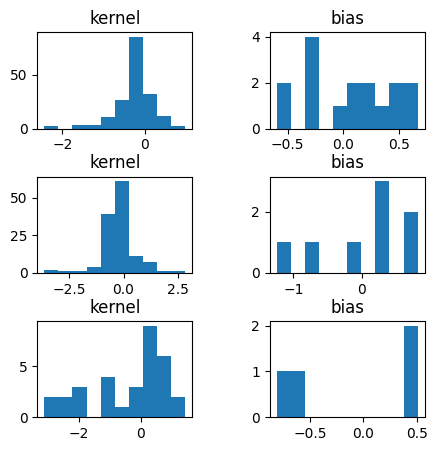

In [43]:
fig, axes = plt.subplots(3, 2, figsize = (5, 5))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
# extracting weights from the layers
weight_layers = [layer for layer in model.layers]
for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align = "left")
        axes[i, j].set_title(layer.weights[j].name)

The weights now follow normal distribution and the biases are non-zero.

Each iteration is 1 forward + 1 backward propagation.

### `validation_data`
- Validation set can also be used explicitly by using the `validation_data` argument in the `fit` method.
- But, the model will have to be re-initialized after defining with `validation_data`, else, the model will start getting trained from its current stage.
- Ideally, the code should be written as a function so that the model definition would not have to be written over and over again.

In [44]:
def create_model():
    model = Sequential(
        [
            Dense(32, activation = "relu", input_shape = (11, ), name = "hidden_1"),
            Dense(16, activation = "relu", name = "hidden_2"),
            Dense(4, activation = "softmax", name = "output")
        ]
    )
    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics = ["accuracy"]
    )
    return model

model = create_model()

`verbose` is now set to `0` to make the training process silent. This prevents the printing of loss and other metrics for each epoch.

In [45]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 500, batch_size = 512, verbose = 0)

The retrieve all the keys associated with the history object, `__dict__` attribute can be used.

In [46]:
history.__dict__.keys()

dict_keys(['params', '_model', 'history', 'epoch'])

Observe that the history object's dictionary has another dictionary with "`history`" inside it.

This can be called as it is available in keys associated with `model.fit`.

In [47]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

`model.fit` has saved all the loss and metric values for each epoch inside the `history` dictionary.

In [48]:
epochs = history.epoch
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

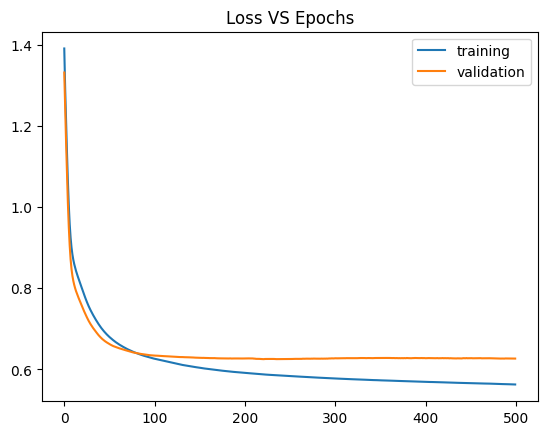

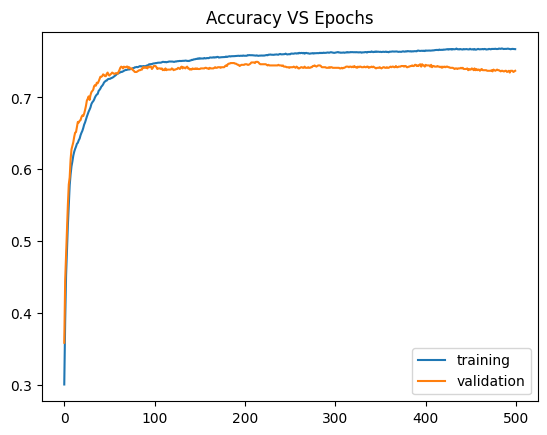

In [49]:
# plotting the loss and accuracy curves fro both training and validation data
plt.figure()
plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, accuracy, label = "training")
plt.plot(epochs, val_accuracy, label = "validation")
plt.legend()
plt.title("Accuracy VS Epochs")
plt.show()

Observations,
- Both training and validation loss decrease with epochs.
- After around 120 epochs, training loss still keeps on decreasing but validation loss starts to increase.
- This means that the model start to overfit the training dataset after 120 epochs. Meaning, the params learnt after 120 epochs are the reason for overfitting on training dataset.

# Keras Functional API
Consider the following model,

<img src = "../artifacts/neural_networks_59.png" alt = "drawing" width = "500">

The above model cannot be designed using Sequential API, as there no way to pass 2 inputs to 1 layer in Sequential API.

The Functional API of Keras is instead used to design such complex models.

### Why is Functional API needed instead of Sequential API?
Functional API gives more flexibility. This API can handle multiple inputs and outputs. Say that there is image and text description as the training or there is a need of a model that outputs 2 or more target variables, for example, a weather forecast model predicting minimum and maximum temperature at the same time, a Sequential API will not be able to do this.

The following image displays why Sequential API cannot be used for complex tasks.

<img src = "../artifacts/neural_networks_60.png" alt = "drawing" width = "500">

Functional API gives more flexibility for network architectures and architectures are not always in sequential manner, there can be 2 layers in parallel.

Although it is recommended to use the simplest methods while building networks (according to Occam's Razor), there sometimes might be a requirement for a more flexible approach while dealing with complex problems that require complex architectures.

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_sequential = Sequential(
    [
        Dense(16, activation = "relu", input_shape = (11, ), name = "hidden_1"),
        Dense(8, activation = "relu", name = "hidden_2"),
        Dense(4, activation = "softmax", name = "output")
    ]
)

So far, models have been created using Sequential API.

In the following lines, the same model is created using Functional API.

In [51]:
from tensorflow.keras.layers import Input

In models created using Sequential API, the input shape was passed in the first layer. In the following models, an additional Input layer which explicitly represents the input data will be used.

Instead of `Sequential` class, the `Model` class from `tensorflow.keras.models.Model` will be used in Functional API.

At first an input layer with the shape of the dataframe is created,

In [52]:
inp = Input(shape = (11, 1))

Next, the 2 hidden layers of the model are created. In here, the previous layer (i.e., input layer) is passed to the current layer and this chain of passing the previous layer to the current layer is carried out until the end (i.e., output layer).

In [53]:
h1 = Dense(16, activation = "relu", name = "hidden_1")(inp)
h2 = Dense(4, activation = "relu", name = "hidden_2")(inp)

At last the final output layer is created. `hidden_2` layer is passed here.

In [54]:
out = Dense(4, activation = "softmax", name = "output")(h2)

After defining the flow of the model, the model is built using `tensorflow.keras.models.Model`. All the inputs and the output are passed here (refer the code in the cell below).

In [55]:
from tensorflow.keras.models import Model

model_functional = Model(inputs = inp, outputs = out, name = "simple_nn")

Generalizing the code within a method,

In [56]:
def create_model_functional():

    inp = Input(shape = (11, 1))

    h1 = Dense(16, activation = "relu", name = "hidden_1")(inp)
    h2 = Dense(8, activation = "relu", name = "hidden_2")(h1)
    
    out = Dense(4, activation = "softmax", name = "output")(h2)

    model = Model(inputs = inp, outputs = out, name = "simple_nn")

    return model

model_functional = create_model_functional()
model_functional.summary()

Model: "simple_nn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 11, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 11, 16)         │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 11, 8)          │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 11, 4)          │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204 (816.00 B)

 Trainable params: 204 (816.00 B)

 Non-trainable params: 0 (0.00 B)

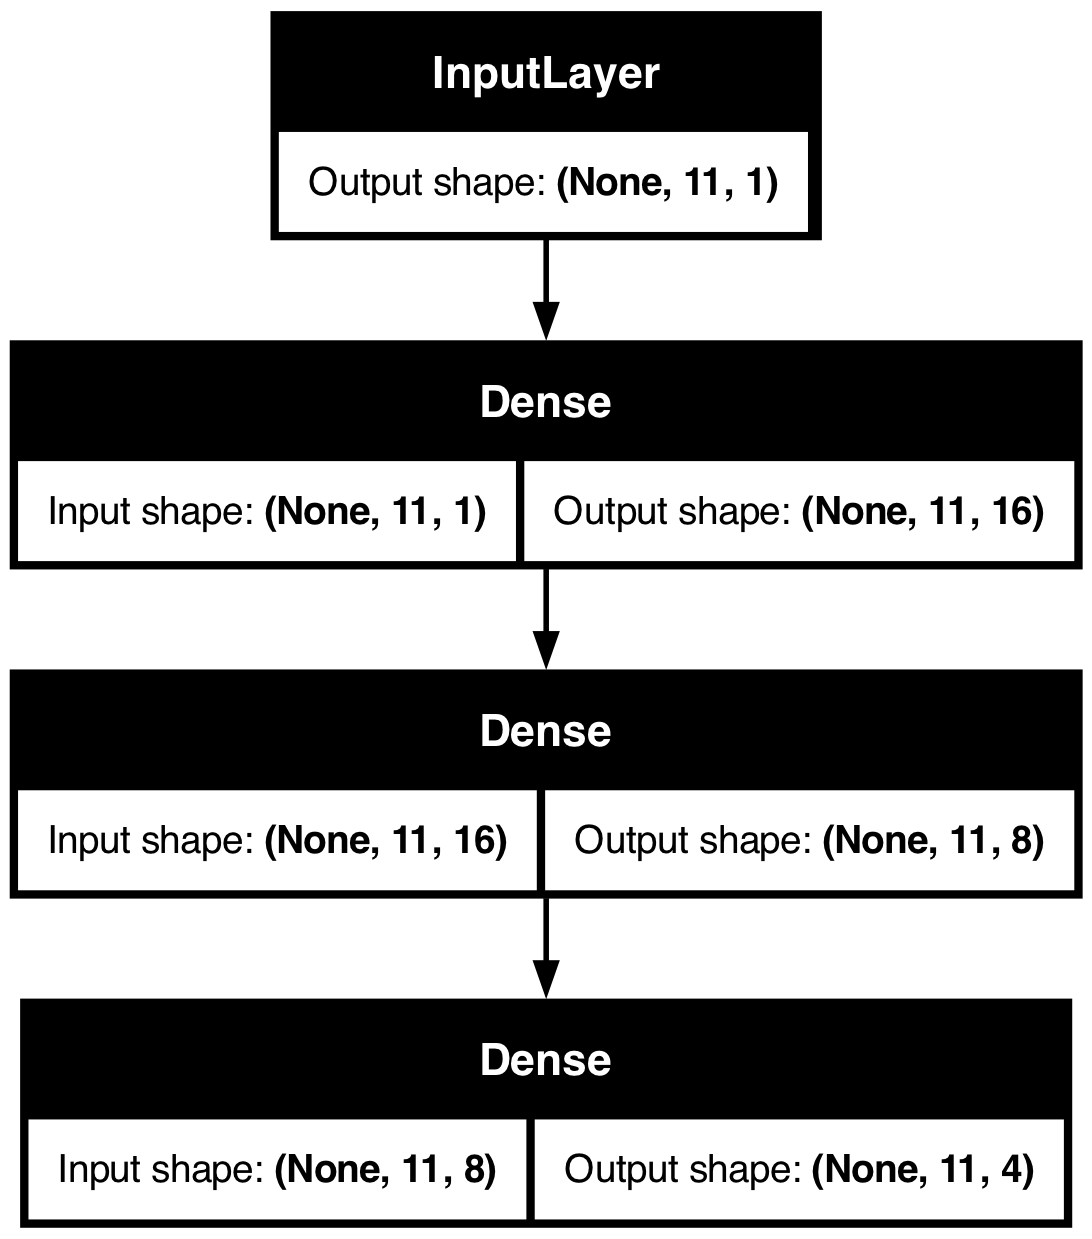

In [57]:
tf.keras.utils.plot_model(model_functional, show_shapes = True)

### Creating a complex model using Functional API

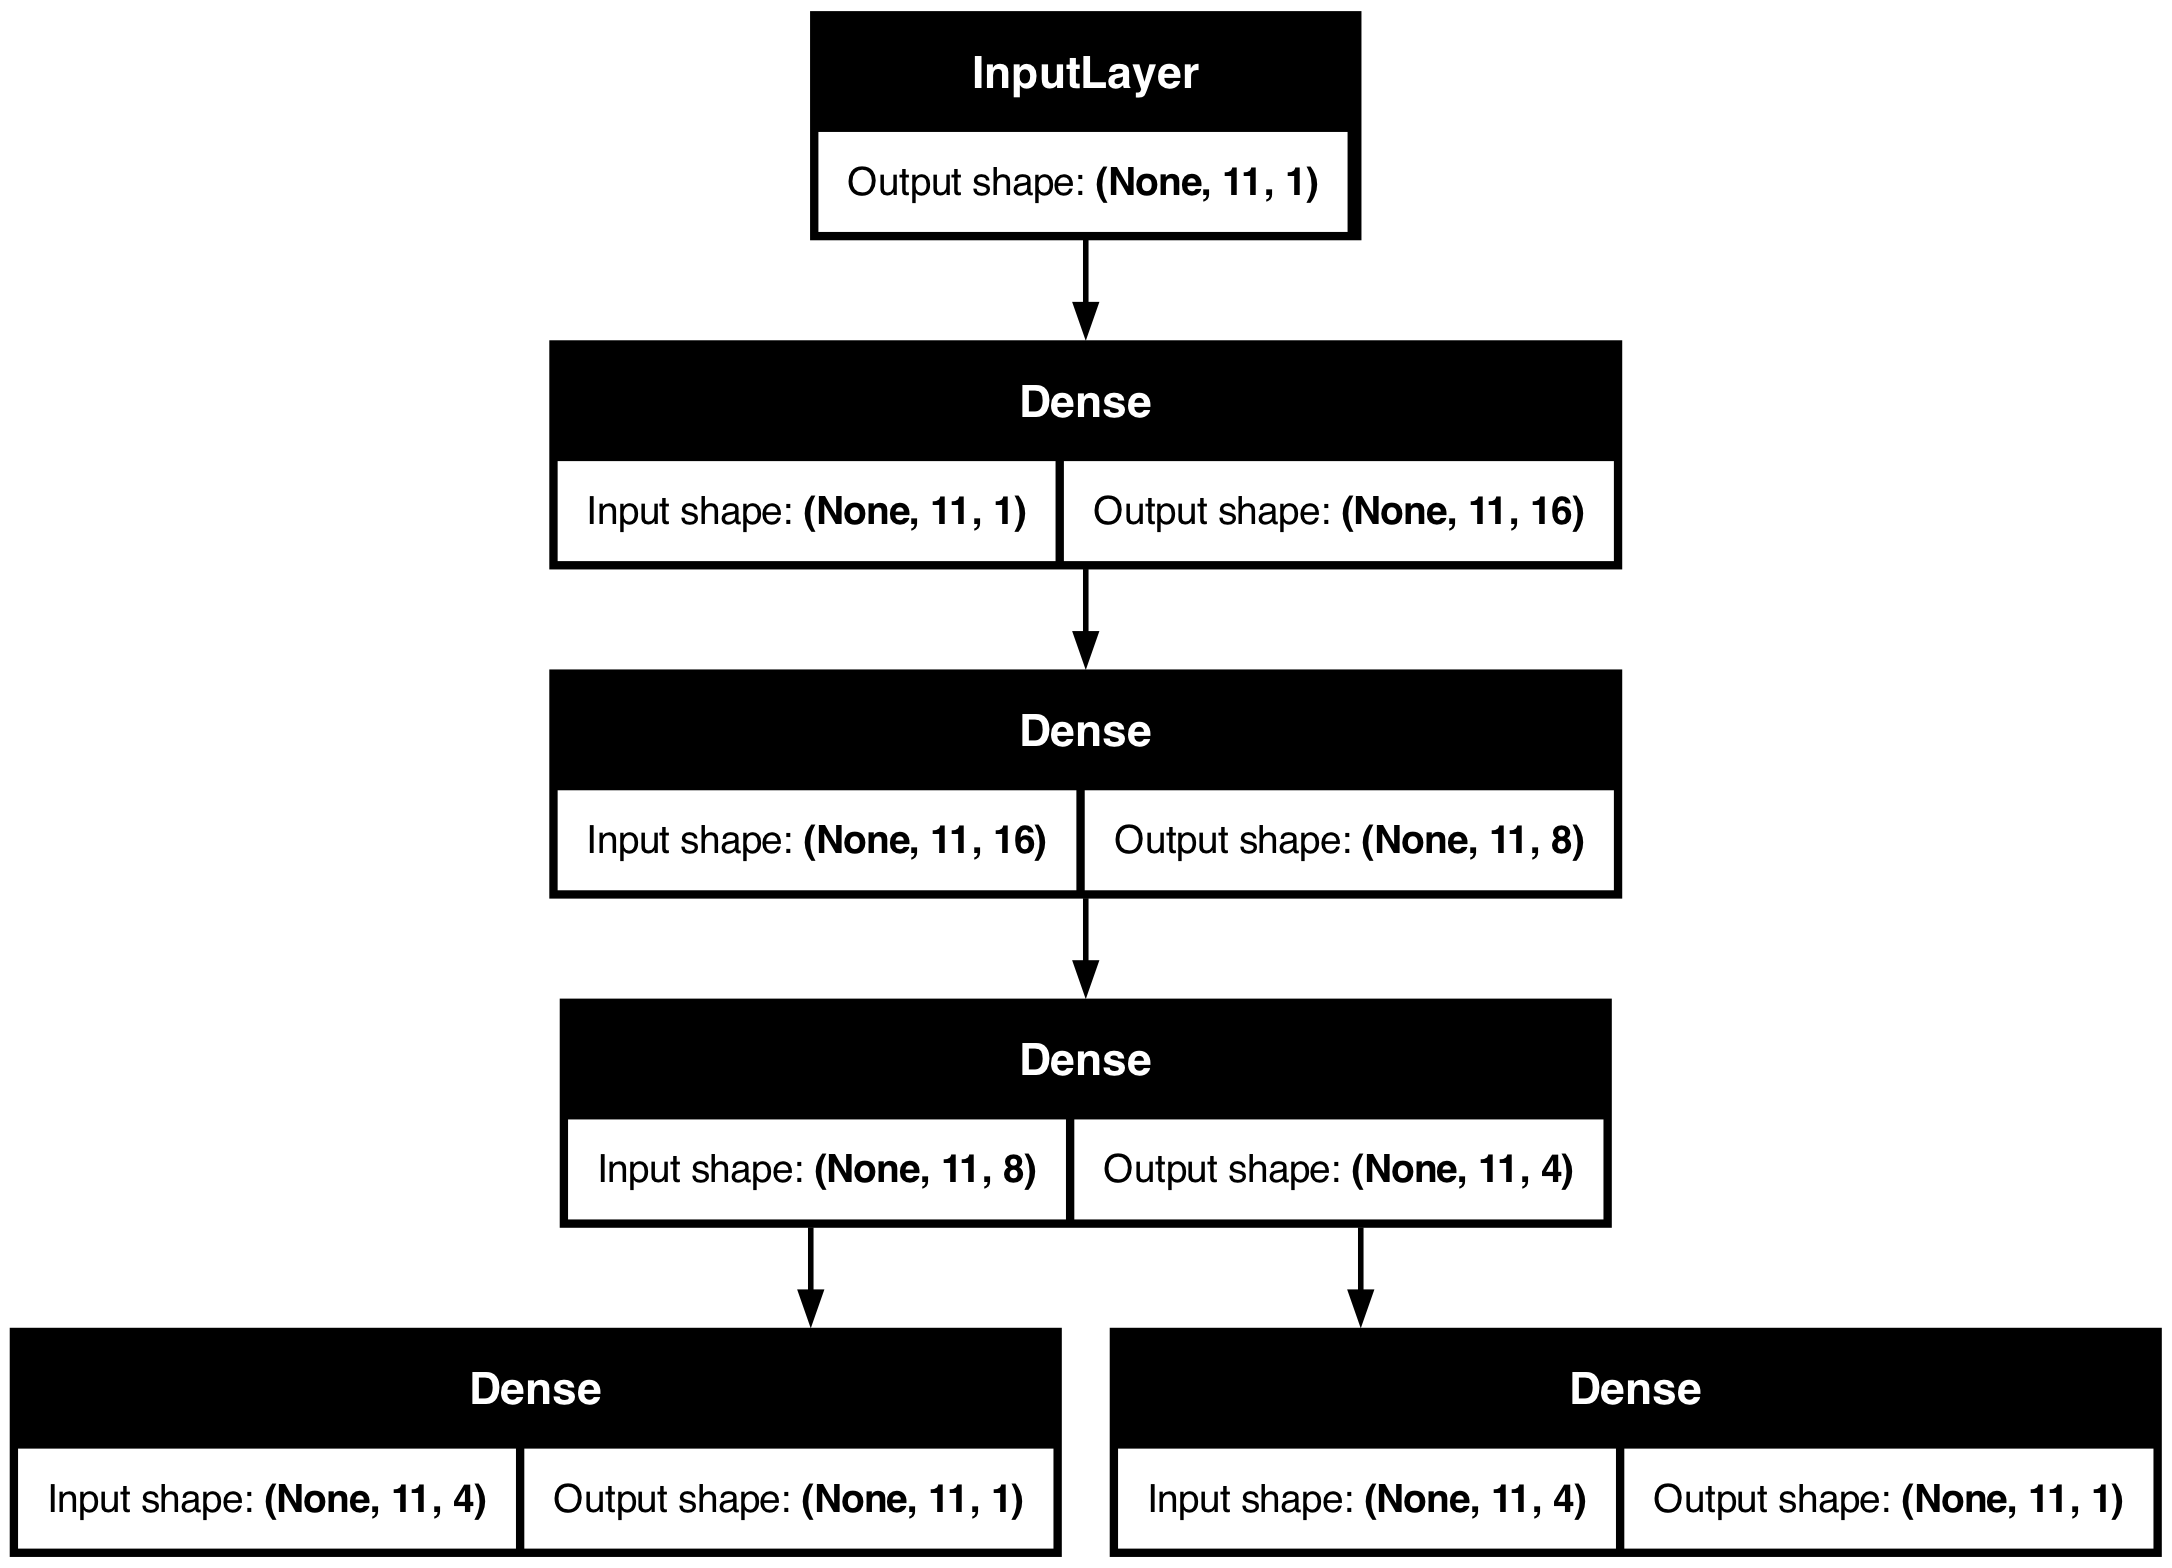

In [58]:
def create_model_multiple_outputs():

    inp = Input(shape = (11, 1))

    h1 = Dense(16, activation = "relu", name = "hidden_1")(inp)
    h2 = Dense(8, activation = "relu", name = "hidden_2")(h1)
    h3 = Dense(4, activation = "relu", name = "hidden_3")(h2)

    out1 = Dense(1, activation = "sigmoid", name = "output_1")(h3)
    out2 = Dense(1, activation = "relu", name = "output_2")(h3)

    model = Model(inputs = inp, outputs = [out1, out2], name = "simple_nn")

    return model

model_multiple_outputs = create_model_multiple_outputs()

tf.keras.utils.plot_model(model_multiple_outputs, show_shapes = True)

# Prediction And Evaluation
The predictions are made using the model created using the Sequential API.

### Model Evaluation
`model.evaluate(x_test, y_test)`
- This returns the loss value and the metrics value for the model.
- It is important to note that, weights or parameters are not updated during evaluation (and prediction).
- This by extension means that only forward pass (propagation) is occurring and no backward pass.

In [59]:
loss, accuracy = model.evaluate(x_train, y_train)
print("Train Set")
print(f"Loss value = {loss}")
print(f"Accuracy = {accuracy}")

339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.7781 - loss: 0.5466
Train Set
Loss value = 0.5599647164344788
Accuracy = 0.770351231098175


In [60]:
loss, accuracy = model.evaluate(x_val, y_val)
print("Validation Set")
print(f"Loss value = {loss}")
print(f"Accuracy = {accuracy}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.7439 - loss: 0.6207
Validation Set
Loss value = 0.6266971230506897
Accuracy = 0.7371475696563721


In [61]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Set")
print(f"Loss value = {loss}")
print(f"Accuracy = {accuracy}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.7627 - loss: 0.6373
Test Set
Loss value = 0.6096783876419067
Accuracy = 0.7597014904022217


### Model prediction
The `predict` method is used to get the predictions on unseen data. Raw output is returned from the model (i.e., probabilities of an observation belong to each one of the 4 classes).

In [62]:
pred = model.predict(x_test)
pred

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step


array([[1.0000000e+00, 1.2222877e-10, 0.0000000e+00, 0.0000000e+00],
       [9.3783066e-04, 9.6689360e-03, 1.3720234e-01, 8.5219091e-01],
       [9.6905723e-02, 3.9904207e-01, 4.8073554e-01, 2.3316592e-02],
       ...,
       [7.3444597e-02, 9.2653370e-01, 2.1786667e-05, 5.7680518e-09],
       [6.1664015e-01, 3.7317076e-01, 1.0179284e-02, 9.6635704e-06],
       [3.0315885e-02, 3.6198506e-01, 6.0758680e-01, 1.1229352e-04]],
      dtype=float32)

The sum of probabilities of an observation belonging to each 1 of the 4 classes is equal to 1.

In [63]:
np.sum(pred, axis = 1)

array([1.       , 1.       , 0.9999999, ..., 1.0000001, 0.9999999,
       1.       ], dtype=float32)

The class to which an observation belongs to can be found by finding the index having the highest probability value.

In [64]:
pred_class = np.argmax(pred, axis = 1)
pred_class

array([0, 3, 2, ..., 1, 0, 2])

To cross-verify, the accuracy of the model can be checked using the `sklearn.metrics.accuracy_score` method.

In [65]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred_class)

0.7597014925373134

# Callbacks
In the earlier part of this document,
- with `verbose = 1`, model training prints the associated data after every epoch.
- with `verbose = 0`, model training prints nothing.

Callbacks are used to customize the printing behavior.

### What are callbacks?
A callback defines a set of function which are executed at different stages of the training procedure. For example, a callback function may run,
1. A function `on_epoch_begin` before every epoch.
2. A function `on_epoch_end` after every epoch.

### How can these callbacks be useful?
They can be used to view internal states of the model during training. For example, there might be a need to print loss, accuracy or learning rate after every 2000-th epoch. For this, a condition, `if epoch % 2000 == 0:`, then perform a certain task like the ones mentioned above may be added.

In the code below a customized callback class is created to print the loss and accuracy for every 50-th epoch. The custom class will inherit from `tensorflow.keras.callbacks.Callback`. This means that all the attributes and methods available in the `keras.callbacks.Callback` class will be available for the customized class (they can also be overridden).

In [66]:
class VerboseCallback(tf.keras.callbacks.Callback):

    # runs only before the training starts
    def on_train_begin(self, logs = None):
        print("Start of training")

    # runs after every epoch
    def on_epoch_end(self, epoch, logs = None):
        if epoch % 50 == 0:
            print(f"Epoch - {str(epoch).zfill(3)}, Loss - {logs['loss']}, Accuracy - {logs['accuracy']}")

    # runs once training is finished
    def on_train_end(self, logs = None):
        print("End of training")

In the above code, a sentence is being printed at the start of training and also at the end of training. Apart from this, the loss and accuracy is printed after every 50-th percentile

`logs` is a dictionary that callback method takes as an argument that will consist of the keys for quantiles relevant to the current batch or epoch like loss, accuracy, etc.

A list of callback objects will have to be passed to the `callbacks` argument of the `fit` method. Optionally, callback objects can be passed to `evaluate` and `predict` method as well.

In [67]:
history = model.fit(x_train, y_train, epochs = 500, batch_size = 256, validation_split = 0.1, verbose = 0, callbacks = [VerboseCallback()])

Start of training
Epoch - 000, Loss - 0.567885160446167, Accuracy - 0.7682852149009705
Epoch - 050, Loss - 0.560689389705658, Accuracy - 0.770948588848114
Epoch - 100, Loss - 0.5568050146102905, Accuracy - 0.771665632724762
Epoch - 150, Loss - 0.5533878803253174, Accuracy - 0.7740217447280884
Epoch - 200, Loss - 0.5504833459854126, Accuracy - 0.7751485109329224
Epoch - 250, Loss - 0.5473516583442688, Accuracy - 0.777094841003418
Epoch - 300, Loss - 0.5443392395973206, Accuracy - 0.7781192660331726
Epoch - 350, Loss - 0.5419671535491943, Accuracy - 0.7796558141708374
Epoch - 400, Loss - 0.5395294427871704, Accuracy - 0.7798606753349304
Epoch - 450, Loss - 0.5376614332199097, Accuracy - 0.7811923623085022
End of training


The parent class `tf.keras.callbacks.Callbacks` supports various kinds of methods which can be overidden.
- Global methods, at the beginning or ending of training.
- Batch-level methods, at the beginning or ending of a batch.
- Epoch-level method, at the beginning or ending of an epoch.

For example,

In [68]:
class TrainingCallback(tf.keras.callbacks.Callback):

    def on_train_begin(self, logs = None):
        print("Starting training...")

    def on_epoch_begin(self, epoch, logs = None):
        print(f"Starting epoch {epoch}")

    def on_train_batch_begin(self, batch, logs = None):
        print(f"Training: Starting batch {batch}")

    def on_train_batch_end(self, batch, logs = None):
        print(f"Training: Finished batch {batch}, loss is {logs['loss']}")

    def on_epoch_end(self, epoch, logs = None):
        print(f"Finished epoch {epoch}, loss is {logs['loss']}, accuracy is {logs['accuracy']}")

    def on_train_end(self, logs = None):
        print("Finished training")

There are some pre-defined callback classes such as `CSVLogger`, `EarlyStopping`, `LearningRateScheduler`. They can be useful for various tasks, for example, `EarlyStopping` can be used to stop the training process as soon as the validation loss starts to increase.

Other examples include,
- `CSVLogger`: Save history object in a `.csv` file, `csv_logger = keras.callbacks.CSVLogger("file_name.csv")`.
- `EarlyStopping`: Stop the training when the model starts to overfit.
- `ModelCheckpoint`: Saves the intermediate model weights.
- `LearningRateScheduler`: Control or change the learning rate between epochs.

# TensorBoard
It is always a good practice to closely monitor the related parameters in the training process, like, changes in the loss, performance or any changes in any parameters. The values of these can be extracted using the `history` method, but they must be explictly plotted to visualize them.

TensorBoard is a dashboard that allows to visualize information regarding the training process like,
- Metrics: Loss, Accuracy.
- Visualize the model graphs.
- Histograms of $w$, $b$ or other tensors as they change during the training.
- Displaying images, text and audio data.

### Installation
- Using PIP: `pip install tensorboard`.
- In Conda Environment: `conda install -c conda-forge tensorboard`.

### Loading TensorBoard in the notebook

In [69]:
%load_ext tensorboard

A log directory, say `logs`, needs to be set.

In [70]:
log_folder = "logs"

Tensorboard will sotre all the logs in in this log directory. It will read from these logs in order to display the various visualizations. The `reload_ext` magic method is used to reload the TensorBoard extension.

In [71]:
%reload_ext tensorboard

The current logs (if there are any) have to be cleared, before saving new logs to the folder.

In [72]:
!rm -rf logs

`tf.keras.callbacks.TensorBoard` has to be imported inorder to use TensorBoard.

In [73]:
from tensorflow.keras.callbacks import TensorBoard

### Callback arguments
- `log_dir` (Path): Specifies the directory where training logs will be saved. This directory should be dedicated solely to the callback's logging purposes.
- `update_freq` (Integer or String): Controls the frequency of loss and metric updates during training.
    - `batch`: Updates are performed after every batch or iteration.
    - `N` (integer): Updates occur every `N` batches.
    - `epoch`: Updates are made at the end of each epoch.
- `histogram_freq` (Integer): Determines how often histograms of weight distributions are computed and saved. A value of `0` indicates that histograms will not be generated.
- `write_graph` (Boolean): Enables or disables visualization of the training graph.
    - `True`: Visualizes the training process.
    - `False`: No visualization is generated.
- `write_images` (Boolean): Controls the visualization of model weights.
    - `True`: Visualizes the model weights.
    - `False`: No weight visualization is performed.

In [74]:
tb_callback = TensorBoard(log_dir = log_folder, histogram_freq = 1)

The model will be trained again, this time using Tensorboard callback.

In [75]:
model = create_model()
history = model.fit(x_train, y_train, epochs = 500, batch_size = 512, validation_data = (x_val, y_val), verbose = 0, callbacks = [tb_callback])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The following shows the TensorBoard dashboard.
- Scalars: Shows loss and metrics.
- Graphs: Shows model training structure.
- Distributions: Distribution of $w$ and $b$.
- Histograms: Histograms of $w$ and $b$.

TensorBoard is launched using the following command line.

In [76]:
# %tensorboard --logdir={log_folder}

Goto this [link](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.03035&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to see a visual demo of neural network training.